### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).

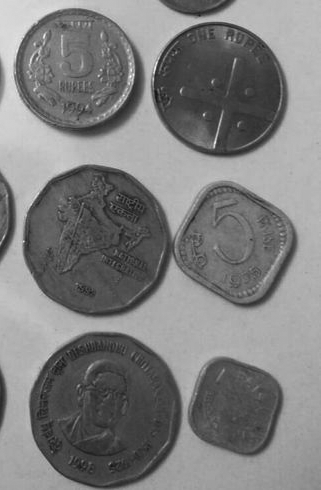

In [83]:
coins = cv2.imread('../data/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

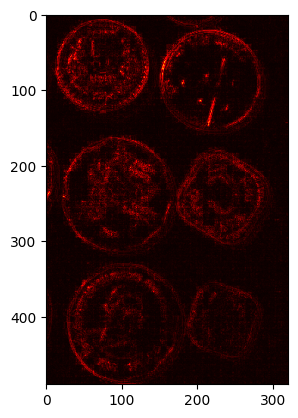

In [84]:
laplacian = cv2.Laplacian(coins, cv2.CV_64F)
laplacian = np.abs(laplacian)
plt.imshow(laplacian, cmap='hot')

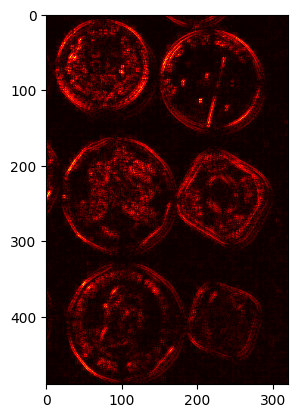

In [85]:
sobelxy = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)
sobelxy = np.abs(sobelxy)
plt.imshow(sobelxy, cmap='hot')

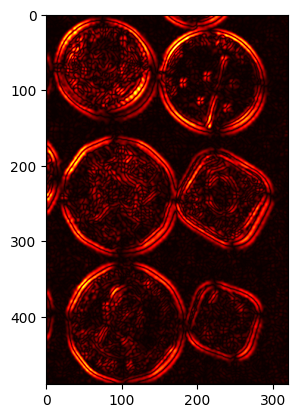

In [86]:
sobelxy = cv2.Sobel(src=coins, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=15)
sobelxy = np.abs(sobelxy)
plt.imshow(sobelxy, cmap='hot')

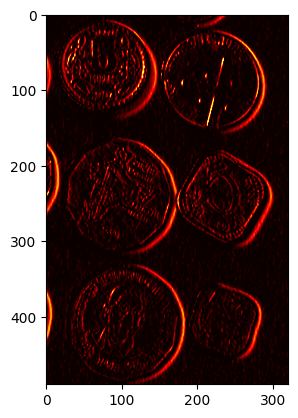

In [87]:
def grad_x(src=coins):
    kernel_grad = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]])
    coins_grad = np.abs(cv2.filter2D(src, -1, kernel_grad))
    plt.imshow(coins_grad, cmap='hot')
    plt.show()


grad_x()

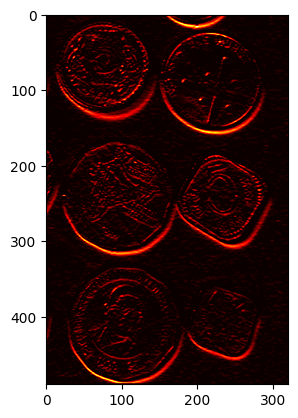

In [88]:
def grad_y(src=coins):
    kernel_grad = np.array([[-1, -1, -1],
                            [0, 0, 0],
                            [1, 1, 1]])
    coins_grad = np.abs(cv2.filter2D(src, -1, kernel_grad))
    plt.imshow(coins_grad, cmap='hot')
    plt.show()

grad_y()

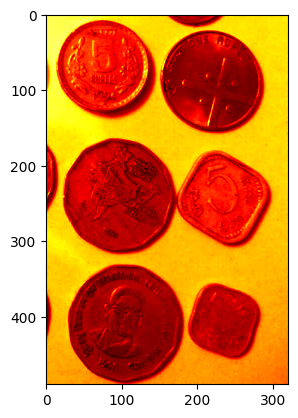

In [89]:
plt.imshow(coins, cmap='hot')  # przykład wyświetlania z mapą kolorów

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów poprzez detekcję krawędzi. Wykorzystaj filtr Canny'ego dla różnych wartości progów oraz filtry redukcji szumu.

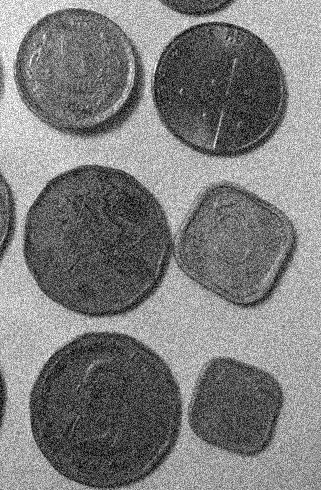

In [90]:
coins_noise = cv2.imread('../data/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

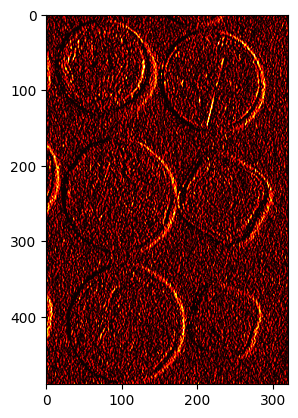

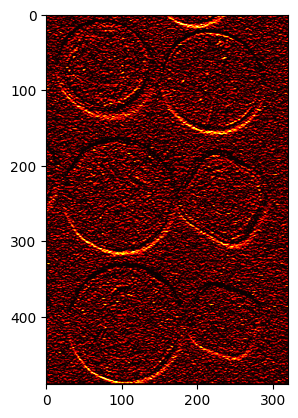

In [91]:
grad_x(coins_noise)
grad_y(coins_noise)

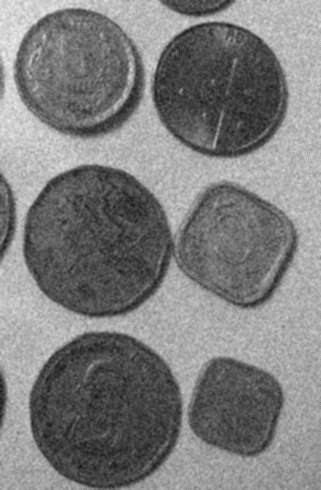

In [92]:
kernel_blur = np.ones((3, 3), np.float32) / 9
noise_filtered = cv2.filter2D(src=coins_noise, ddepth=-1, kernel=kernel_blur)
Image.fromarray(noise_filtered)

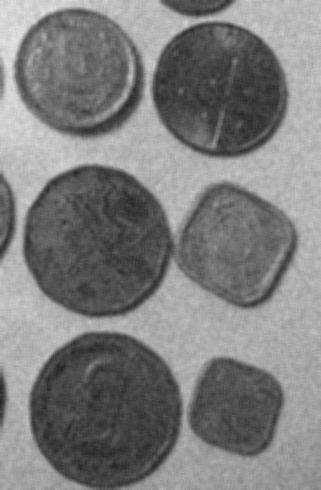

In [93]:
kernel_blur5 = np.ones((5, 5), np.float32) / 25
noise_filtered5 = cv2.filter2D(src=coins_noise, ddepth=-1, kernel=kernel_blur5)
Image.fromarray(noise_filtered5)

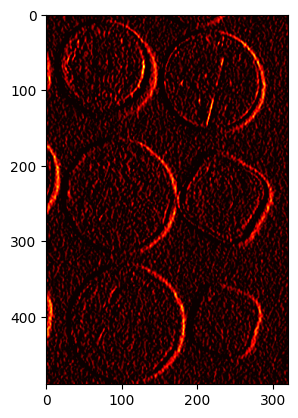

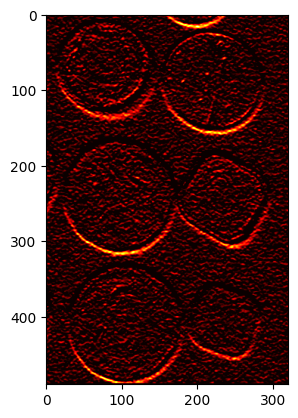

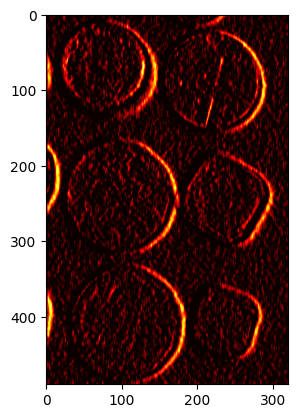

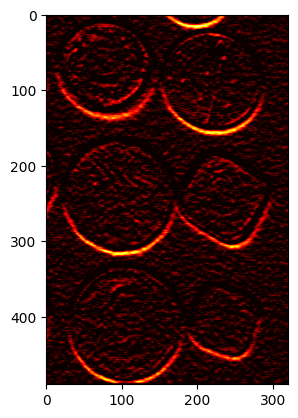

In [94]:
grad_x(noise_filtered)
grad_y(noise_filtered)

grad_x(noise_filtered5)
grad_y(noise_filtered5)

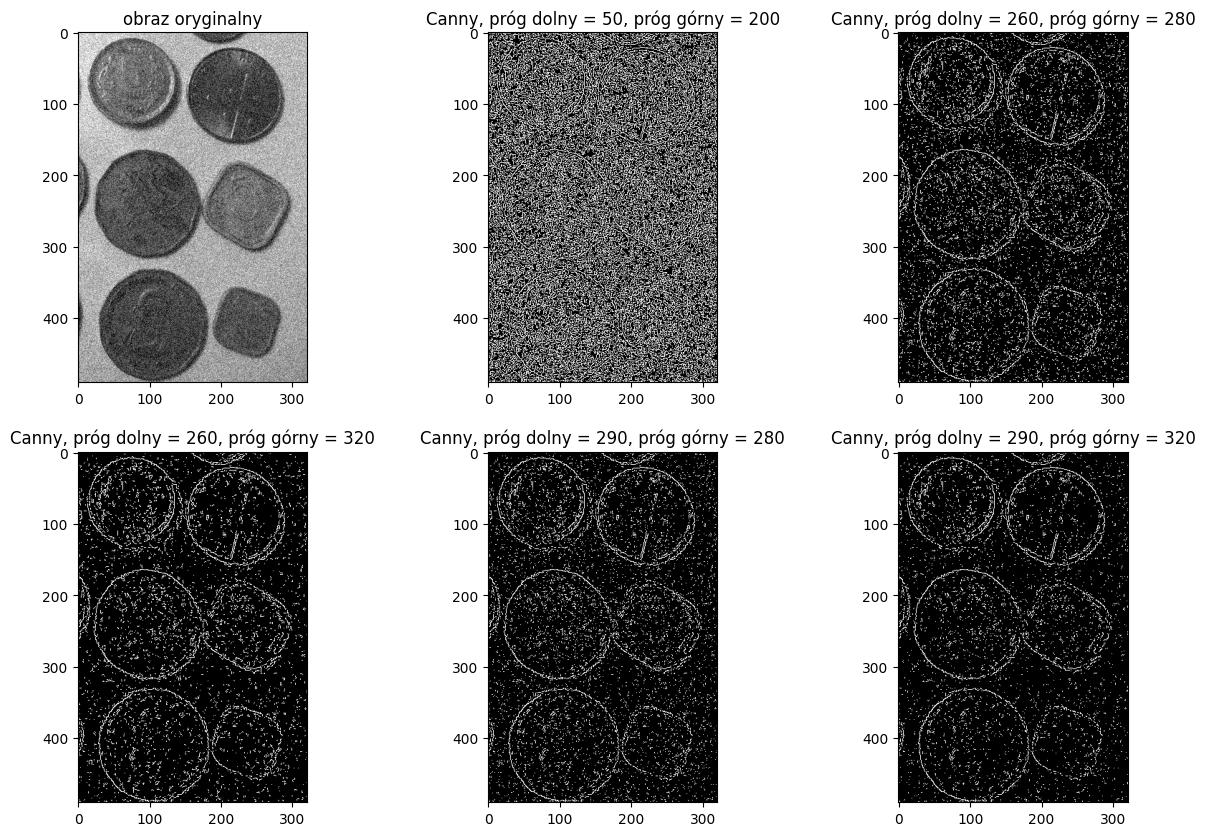

In [95]:
def canny(img=coins_noise):
    f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
    f.set_figwidth(15)
    f.set_figheight(10)
    a1.imshow(img, cmap='gray')
    a1.set_title('obraz oryginalny')
    for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [50, 260, 260, 290, 290], [200, 280, 320, 280, 320]):
        ax.imshow(cv2.Canny(image=img, threshold1=t1, threshold2=t2), cmap='gray')
        ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))


canny(coins_noise)

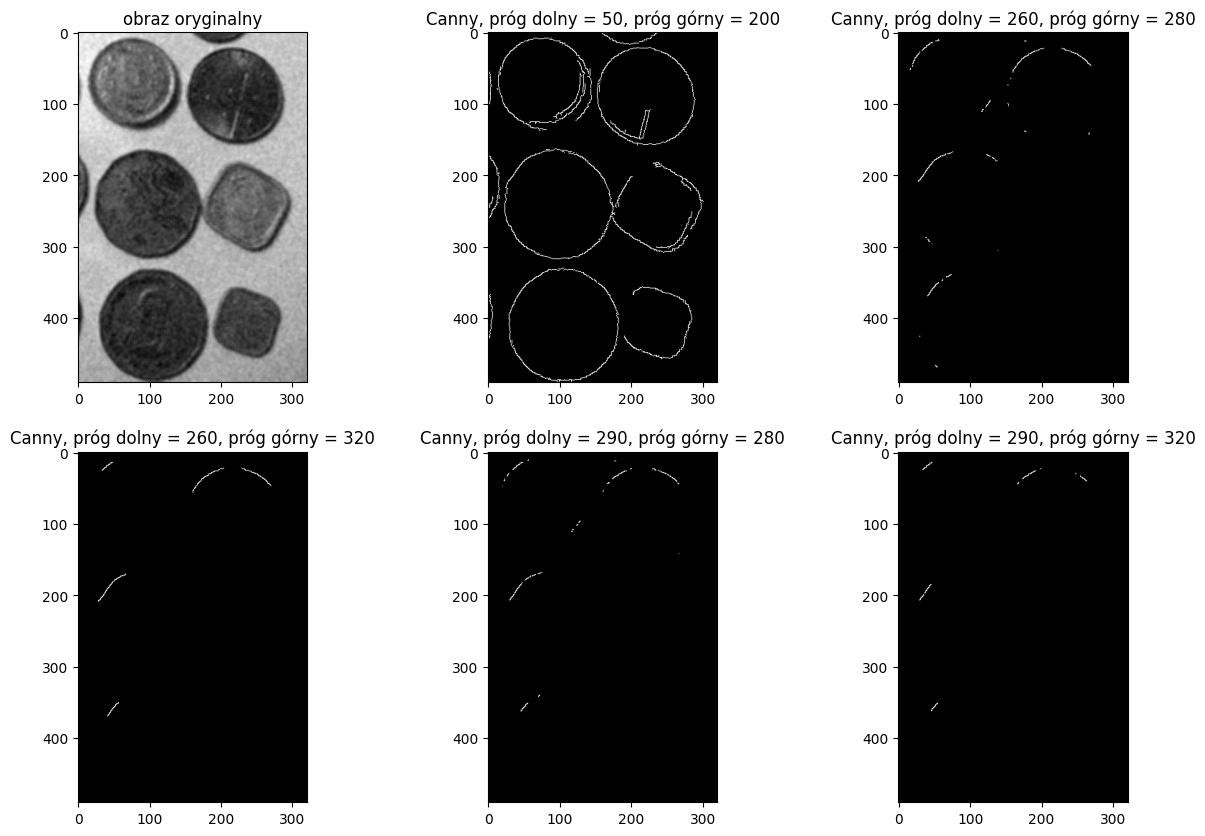

In [96]:
canny(noise_filtered5)

---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów.

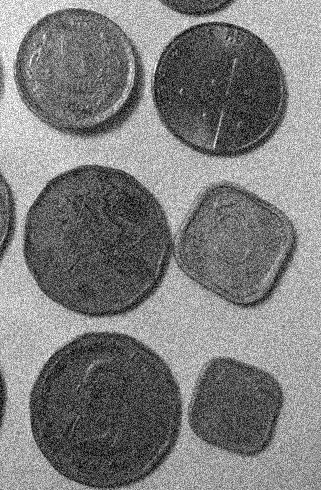

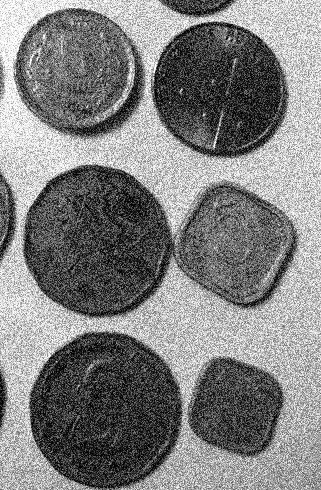

In [97]:
coins_noise_eq = cv2.equalizeHist(coins_noise)
display(Image.fromarray(coins_noise))
display(Image.fromarray(coins_noise_eq))

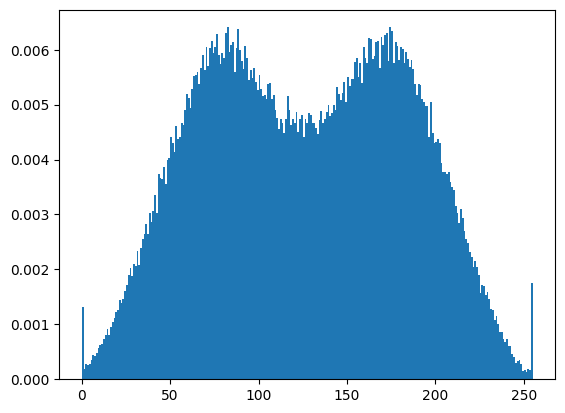

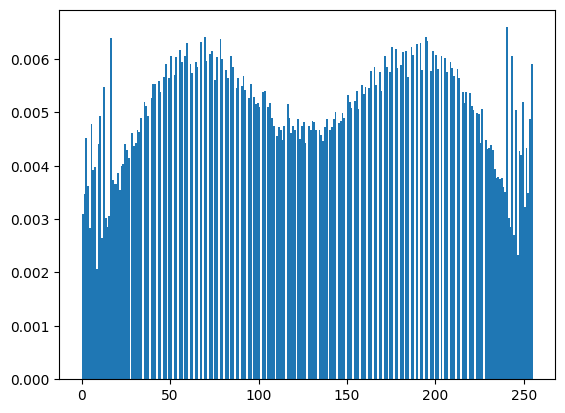

In [98]:
plt.hist(coins_noise.flatten(), bins=255, density=True)
plt.show()
plt.hist(coins_noise_eq.flatten(), bins=255, density=True)
plt.show()

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazów `hare_gray` i `hare_color` wykonaj transformacje na składowych S i/lub V modelu HSV, przechodząc do wybranego (założonego) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu.

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

**4A** (`hare_gray`):

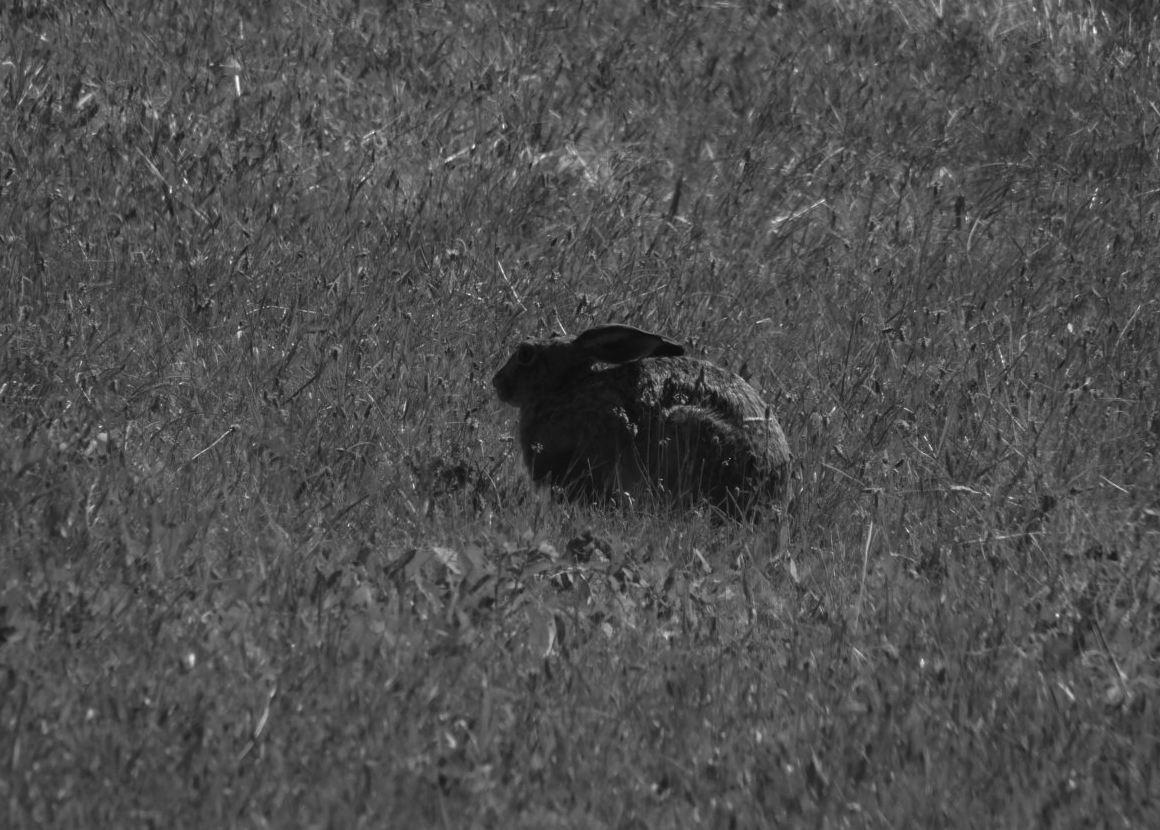

In [15]:
hare_gray = cv2.imread('../data/Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

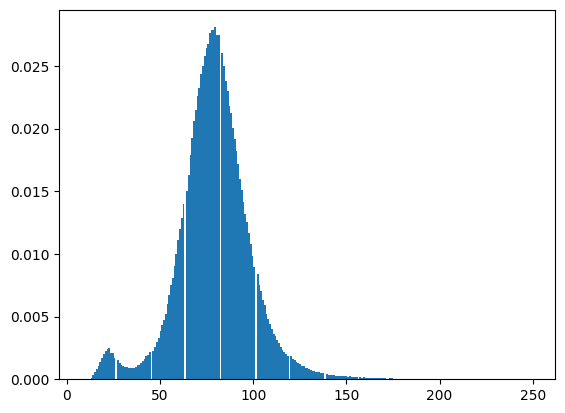

In [100]:
plt.hist(hare_gray.flatten(), bins=255, density=True)
plt.show()

0.8276161894119565


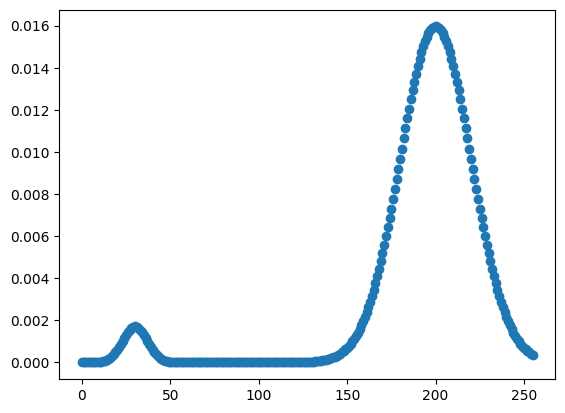

In [49]:
from scipy.stats.distributions import norm
x = np.arange(0, 256)
cdf1 = norm.cdf(x, 30, 7)
pdf1 = norm.pdf(x, 30, 7)

cdf2 = norm.cdf(x, 200, 20)
pdf2 = norm.pdf(x, 200, 20)
cdf = cdf1 * 0.03 + cdf2 * 0.8
pdf = pdf1 * 0.03 + pdf2 * 0.8
print(cdf.max())
plt.scatter(y=pdf, x = x)

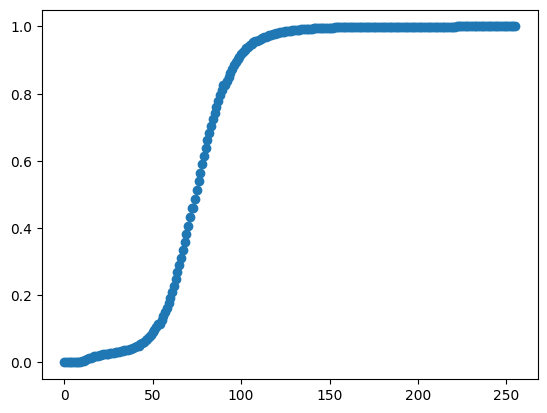

In [50]:
def generate_cdf(img):
    count, bins_count = np.histogram(img, bins=256)
    pdf_hare_gray = count / sum(count)
    cdf_hare_gray = np.cumsum(pdf_hare_gray)
    plt.scatter(y=cdf_hare_gray, x=x)
    plt.show()
    return cdf_hare_gray


cdf_hare_gray = generate_cdf(hare_gray)

In [17]:
def gen_lookup(cdf1, cdf2):
    to_return = []
    for i in range(256):
        value = cdf1[i]
        where = np.where(cdf2 <= value)
        if len(where[0]) == 0:
            index = 0
        else:
            index = np.argmax(where)
        to_return.append(index)
    return np.array(to_return)

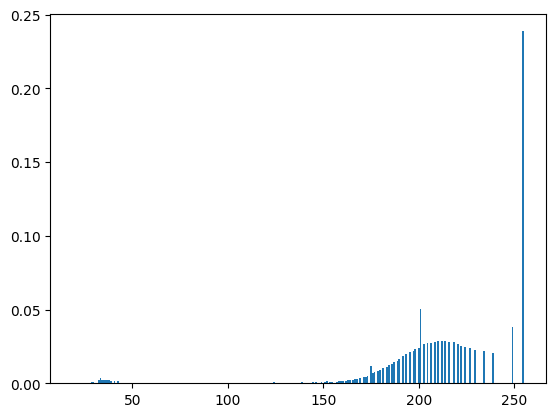

In [51]:
look_up = gen_lookup(cdf_hare_gray, cdf)
result = cv2.LUT(hare_gray, look_up)
plt.hist(result.flatten(), bins=255, density=True)
plt.show()

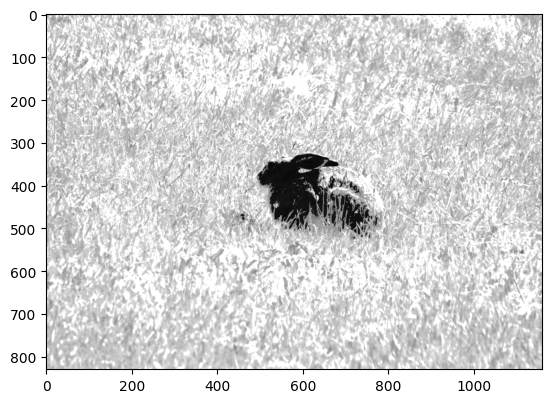

In [52]:
plt.imshow(result, cmap='gray')

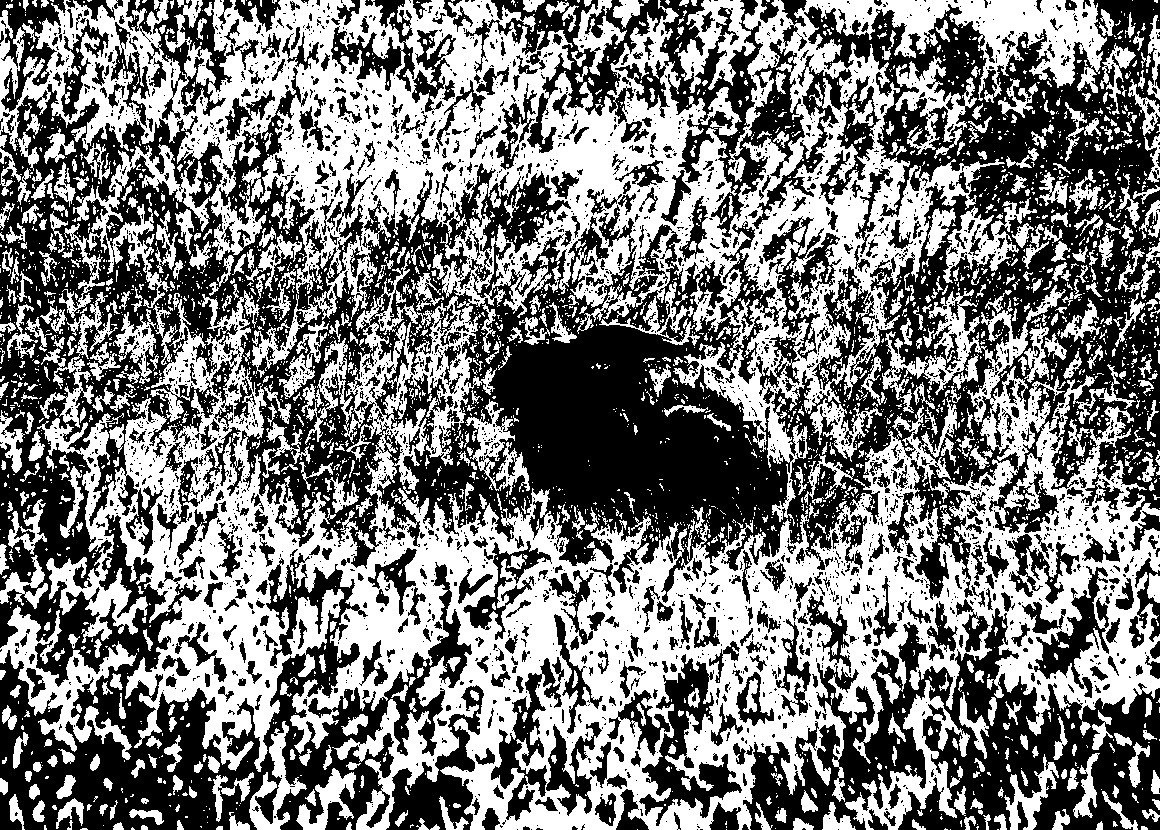

In [53]:
th, th_img = cv2.threshold(hare_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
Image.fromarray(th_img)

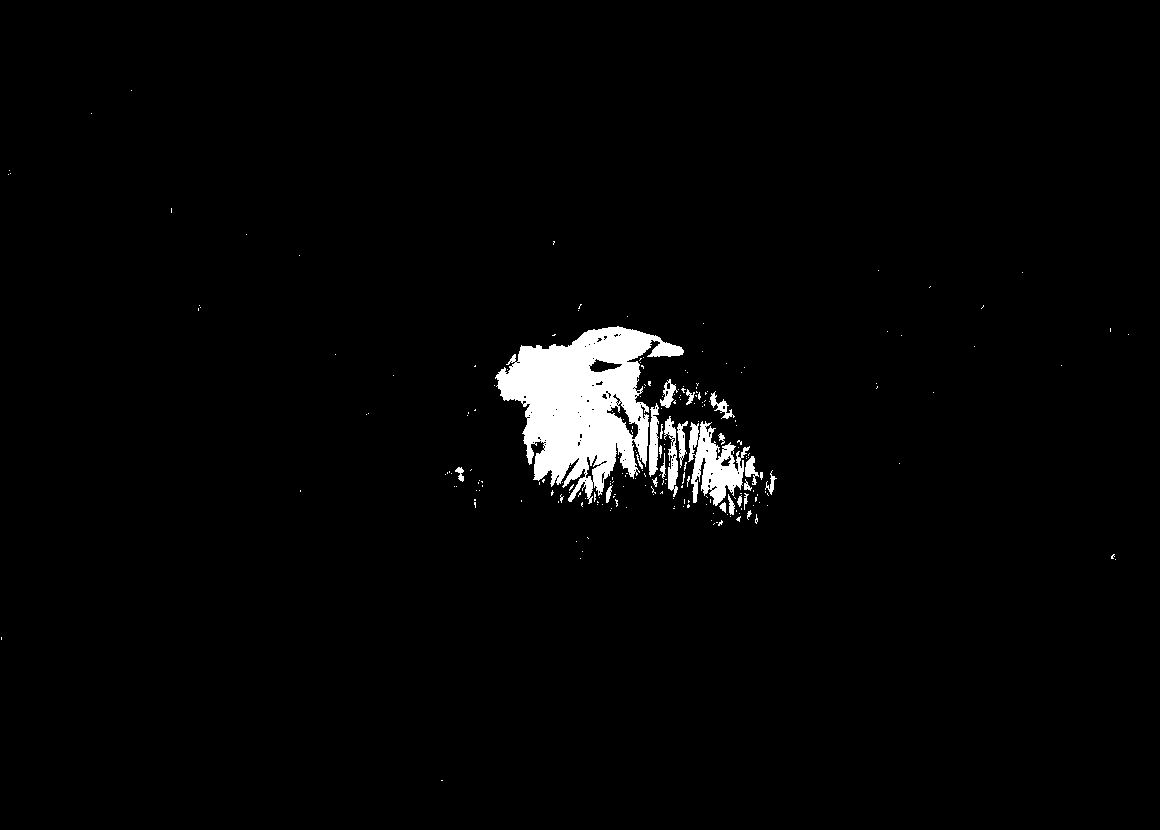

In [54]:
th, th_img = cv2.threshold(result.astype('uint8'), 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
Image.fromarray(th_img)

---

**4B** (`hare_color`):

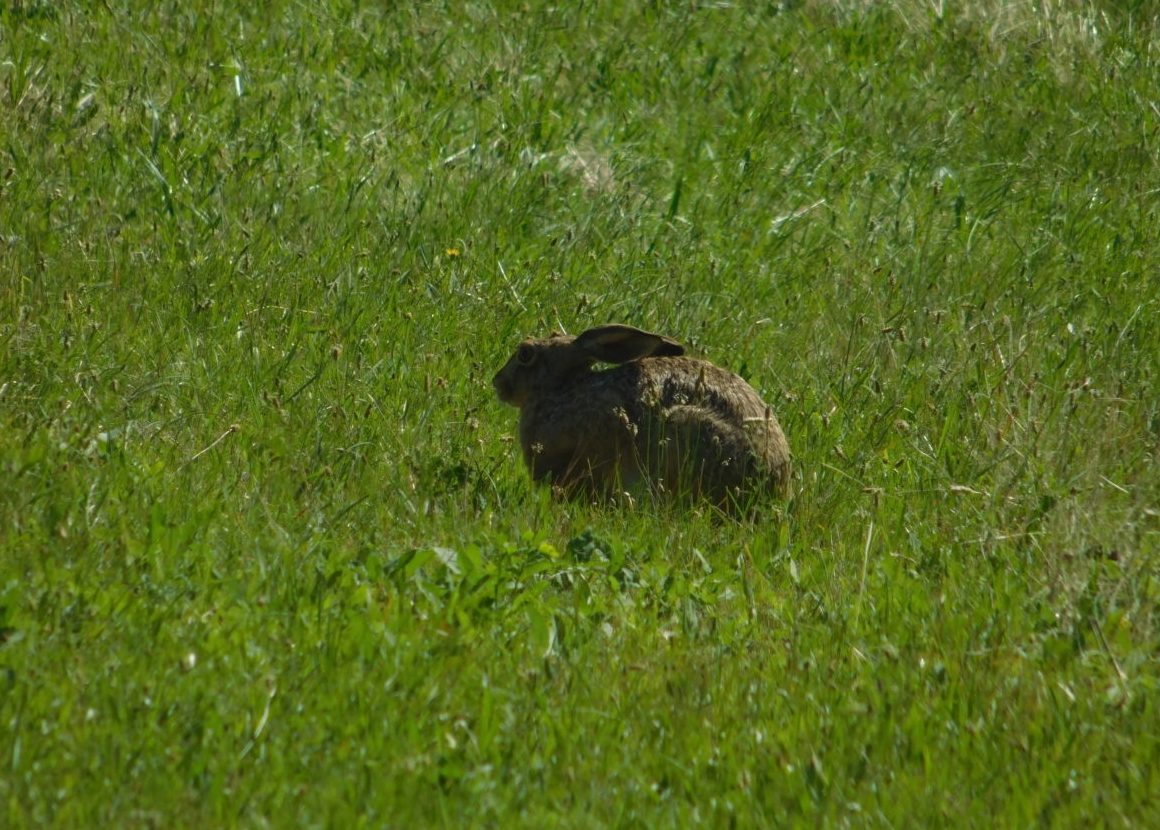

In [42]:
hare_color = cv2.imread('../data/Zajac_kolor.jpg')
Image.fromarray(hare_color[..., ::-1])

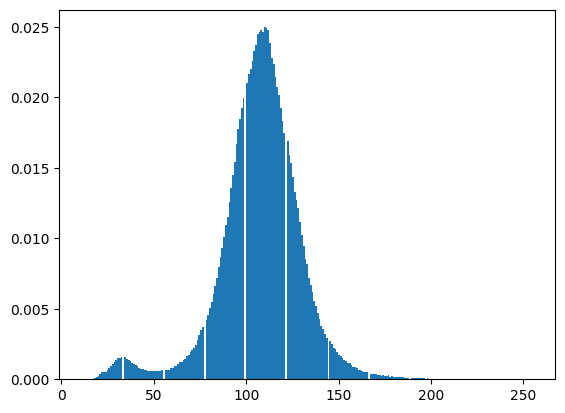

In [112]:
plt.hist(hare_color[..., 1].flatten(), bins=255, density=True)
plt.show()

Rozwiązanie:

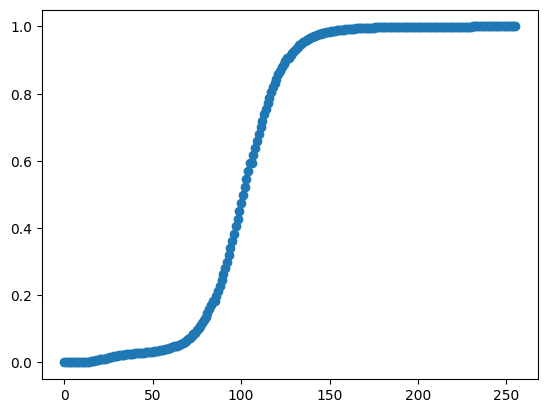

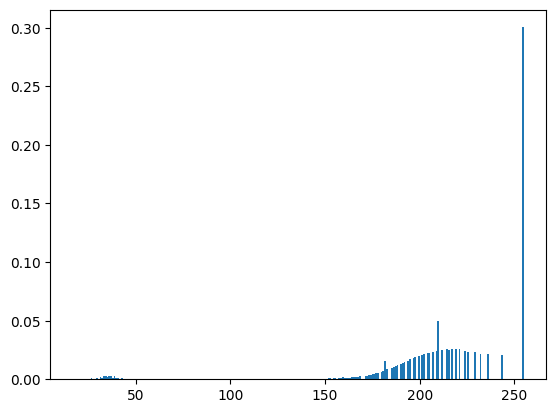

In [58]:
hare_hsv = cv2.cvtColor(hare_color, cv2.COLOR_BGR2HSV)
hare_v = hare_hsv[..., 2]
cdf_hare_color = generate_cdf(hare_v)
look_up = gen_lookup(cdf_hare_color, cdf)
result_c = cv2.LUT(hare_v, look_up)
plt.hist(result_c.flatten(), bins=255, density=True)
plt.show()

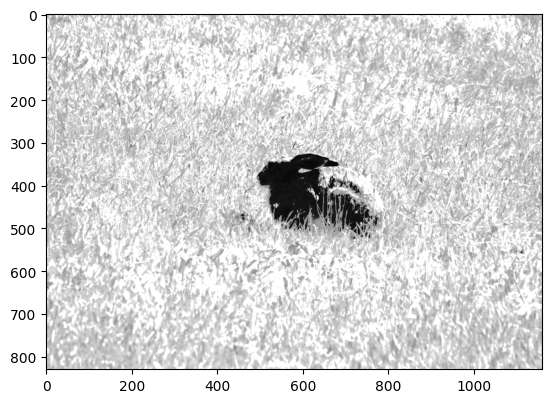

In [59]:
plt.imshow(result_c, cmap='gray')

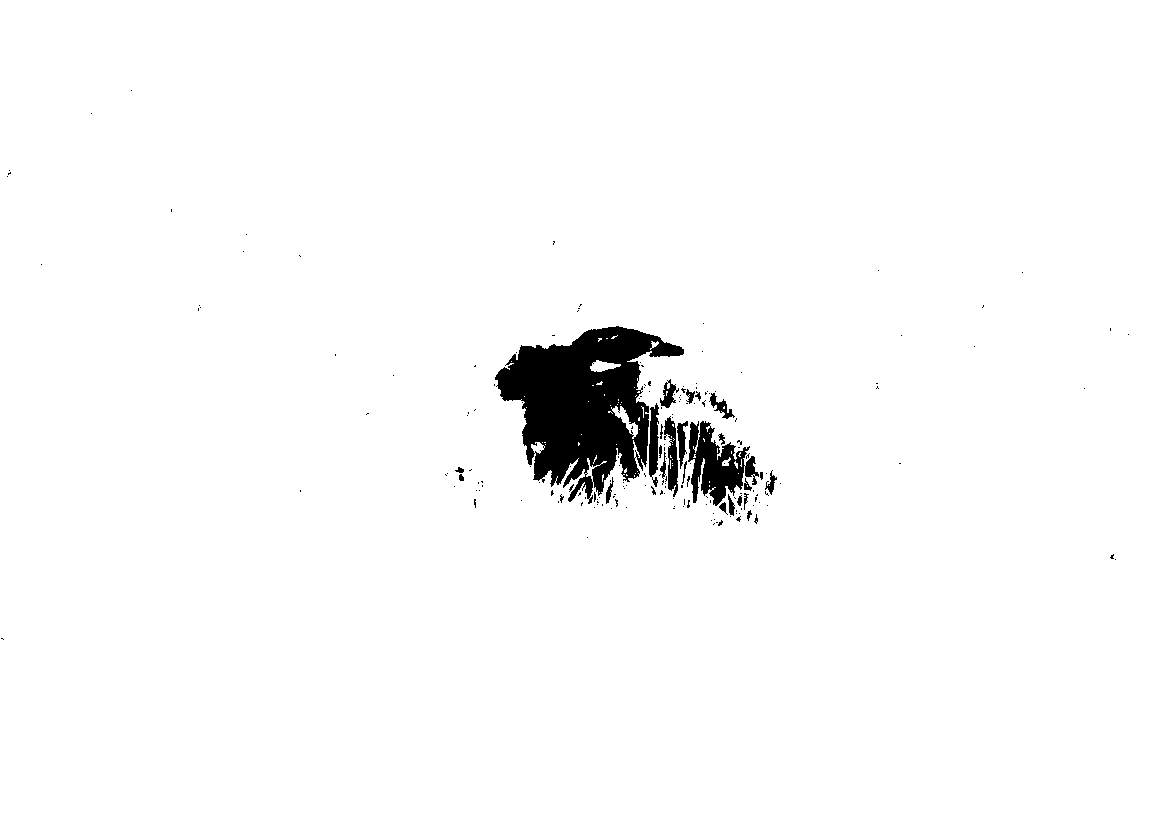

In [60]:
th, th_img = cv2.threshold(result_c.astype('uint8'), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
Image.fromarray(th_img)

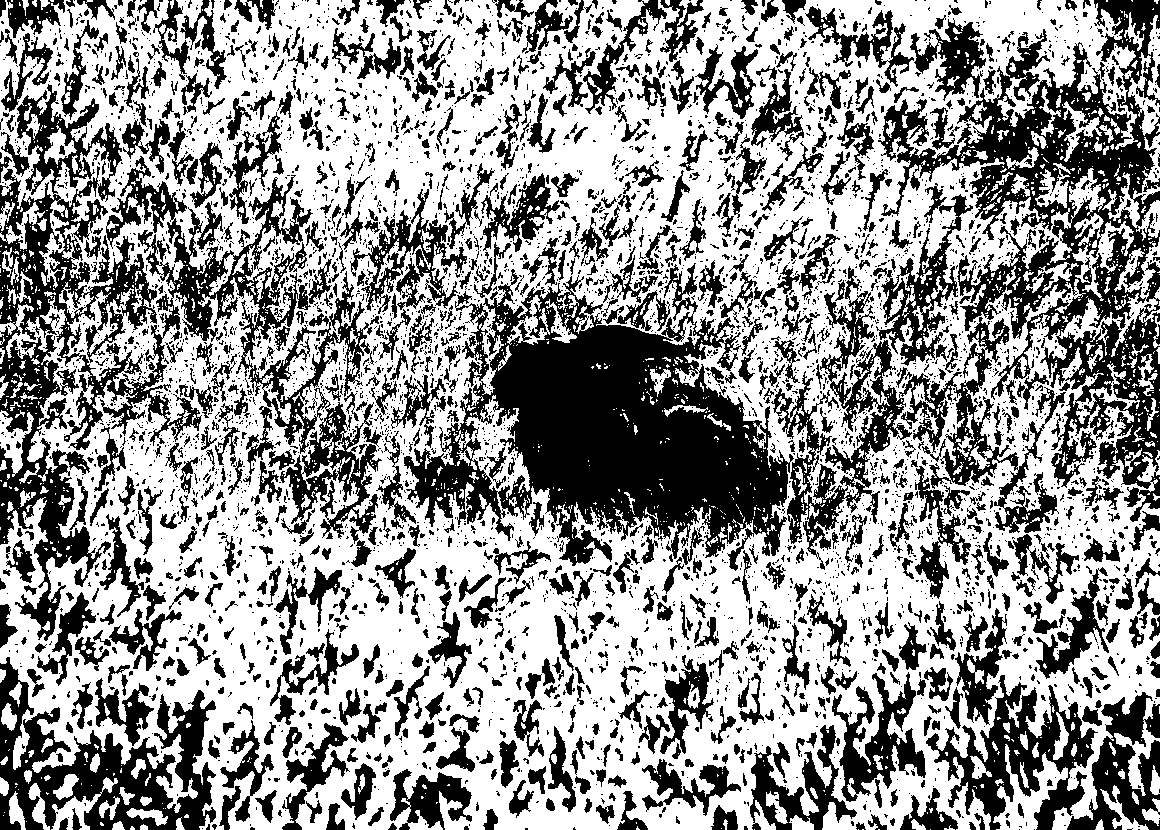

In [70]:
th, th_img = cv2.threshold(hare_color[..., 1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
Image.fromarray(th_img)